In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk

df = pd.read_csv("testDirty.csv")

In [20]:
print(df.shape)

(1459, 80)


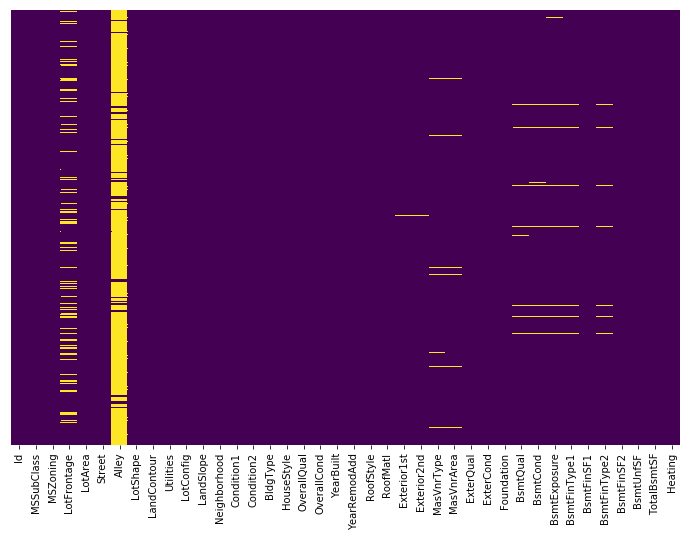

In [4]:
headers = list(df)
plt.figure(figsize=(12,8))
sns.heatmap(df.loc[:,headers[0:40]].isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()


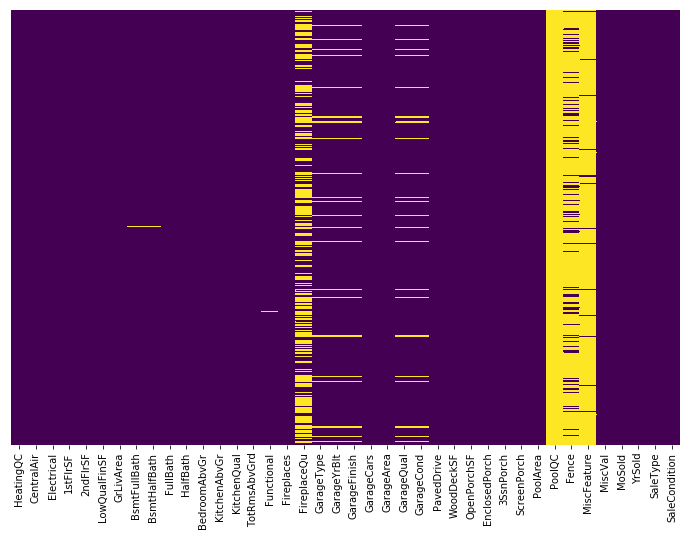

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.loc[:,headers[40:80]].isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()

In [18]:
actions=[
    "Run away from your problems",
    "Delete column",
    "Remove samples",
    "Fill with 0",
    "Fill with mean",
    "Fill with median",
    "Fill with mode",
]

def populateEVs():
    evalues = list(ser.unique())
    evalues = evalues[0:1000] # more than 1000 items in a drop down menu is insanity
    select = tk.OptionMenu(ask,existing_value,*evalues)
    select.grid(row=i,column=1)
    
def CheckAct():
    s = act_choice.get()
    if not(s):
        pass
    else:
        if s == "Fill with an existing value":
            e = existing_value.get()
            if not(e):
                pass
            else:
                whatToDo[header] = ("custom",e)
                ask.destroy()
        elif s == "Fill with a new value":
            e = newValue.get()
            if not(e):
                pass
            else:
                whatToDo[header] = ("custom",e)
                ask.destroy()
        else:
            whatToDo[header] = ("stock",s)
            ask.destroy()
            


In [ ]:
whatToDo = {}
for header in headers:
    ser = df.loc[:,header]
    if ser.isnull().sum():
        integrity = ser.count() / ser.shape[0]
        ask = tk.Tk()
        ask.geometry('650x350')
        ask.attributes('-type', 'dialog')
        act_choice = tk.StringVar(ask)
        qst=tk.Label(ask,text="The column "+header+" has missing data.\n What should we do?")
        qst.grid(row=0,column=1)
        integ = tk.Label(ask,text=str("%.3f%% data integrity" % (100*integrity)))
        integ.grid(row=1,column=2)
        #evalues = set(["NA"])
        i=1
        for act in actions:
            tk.Radiobutton(ask,
                           text=act,
                           padx=20,
                           indicatoron=0,
                           width=20,
                           variable=act_choice,
                           value=act).grid(row=i,column=0)
            i += 1
        tk.Radiobutton(ask,
                       text="Fill with an existing value",
                       padx=20,
                       indicatoron=0,
                       width=20,
                       command=populateEVs,
                       variable=act_choice,
                       value="Fill with an existing value").grid(row=i,column=0)
        tk.Radiobutton(ask,
                       text="Fill with a new value",
                       padx=20,
                       indicatoron=0,
                       width=20,
                       variable=act_choice,
                       value="Fill with a new value").grid(row=i+1,column=0)
        newValue = tk.Entry(ask)
        newValue.grid(row=i+1,column=1)
        existing_value = tk.StringVar(ask)
        commit = tk.Button(ask,
                           text="OK, NEXT!",
                           fg="blue",
                           command=CheckAct,
                           bg="magenta")
        commit.grid(row=i+1,column=2)
        ask.mainloop()

In [21]:
whatToDo = {'LotFrontage': ('stock', 'Fill with median'), 'Alley': ('stock', 'Run away from your problems'), 'MasVnrType': ('custom', 'None'), 'MasVnrArea': ('custom', '0.0'), 'BsmtQual': ('stock', 'Run away from your problems'), 'BsmtCond': ('stock', 'Run away from your problems'), 'BsmtExposure': ('stock', 'Run away from your problems'), 'BsmtFinType1': ('stock', 'Run away from your problems'), 'BsmtFinType2': ('stock', 'Run away from your problems'), 'Electrical': ('stock', 'Remove samples'), 'FireplaceQu': ('stock', 'Run away from your problems'), 'GarageType': ('stock', 'Run away from your problems'), 'GarageYrBlt': ('stock', 'Run away from your problems'), 'GarageFinish': ('stock', 'Run away from your problems'), 'GarageQual': ('stock', 'Run away from your problems'), 'GarageCond': ('stock', 'Run away from your problems'), 'PoolQC': ('stock', 'Run away from your problems'), 'Fence': ('stock', 'Run away from your problems'), 'MiscFeature': ('stock', 'Delete column')}
print(whatToDo)

{'LotFrontage': ('stock', 'Fill with median'), 'Alley': ('stock', 'Run away from your problems'), 'MasVnrType': ('custom', 'None'), 'MasVnrArea': ('custom', '0.0'), 'BsmtQual': ('stock', 'Run away from your problems'), 'BsmtCond': ('stock', 'Run away from your problems'), 'BsmtExposure': ('stock', 'Run away from your problems'), 'BsmtFinType1': ('stock', 'Run away from your problems'), 'BsmtFinType2': ('stock', 'Run away from your problems'), 'Electrical': ('stock', 'Remove samples'), 'FireplaceQu': ('stock', 'Run away from your problems'), 'GarageType': ('stock', 'Run away from your problems'), 'GarageYrBlt': ('stock', 'Run away from your problems'), 'GarageFinish': ('stock', 'Run away from your problems'), 'GarageQual': ('stock', 'Run away from your problems'), 'GarageCond': ('stock', 'Run away from your problems'), 'PoolQC': ('stock', 'Run away from your problems'), 'Fence': ('stock', 'Run away from your problems'), 'MiscFeature': ('stock', 'Delete column')}


In [22]:
df2 = pd.DataFrame()
naughtyList = [] # Where we keep all those headers whose NaN rows we will delete later
for header in headers:
    if header in whatToDo:
        (SoC, order) = whatToDo[header]
        if SoC == "custom":
            df2[header] = df[header].copy().fillna(order)
        elif order == "Run away from your problems":
            df2[header] = df[header].copy()
        elif order == "Delete column":
            pass
        elif order == "Remove samples":
            df2[header] = df[header].copy()
            naughtyList.append(header)
        elif order == "Fill with 0":
            df2[header] = df[header].copy().fillna(0)
        elif order == "Fill with mean":
            df2[header] = df[header].copy().fillna(df[header].mean())
        elif order == "Fill with median":
            df2[header] = df[header].copy().fillna(df[header].median())
        elif order == "Fill with mode":
            df2[header] = df[header].copy().fillna(df[header].mode()[0])
        else:
            print("Warning! Column header "+header+" was not handled! The order was: "+str((SoC,order)))
    else:
        df2[header] = df[header].copy()
print(naughtyList)

['Electrical']


In [16]:
        
df2.dropna(subset=naughtyList,inplace=True)

In [23]:
print(df.shape)
print(df2.shape)

(1459, 80)
(1459, 79)


In [24]:
df2.to_csv("yoloTest.csv",index=False)